In [12]:
import time
import os
import numpy as np
from PIL import Image, ImageDraw
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [13]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")
for captcha_string in os.listdir("../../data/images/v2/"):
    db2.add_untracked_images(captcha_string)

In [14]:
db2.get_info()
paths, positions = db2.get_solved_captchas(count=10)
images = [Image.open("../../data/images/v2/"+path) for path in paths]

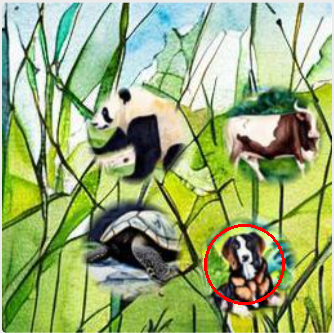

In [15]:
%run v2_handler.py
img = display_image_with_circle(images[0], positions[0])

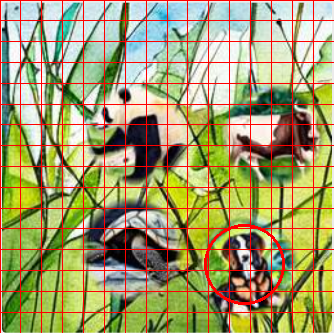

In [16]:
edit = img.copy()
draw = ImageDraw.Draw(edit)
grid_size = 16
for x in np.linspace(0, edit.width, grid_size+1):
    draw.line((x, 0, x, edit.height), fill="red", width=1)
for y in np.linspace(0, edit.height, grid_size+1):
    draw.line((0, y, edit.width, y), fill="red", width=1)
display(edit)

In [17]:
# all coordinates in the grid 
edit = img.copy()
draw = ImageDraw.Draw(edit)

coords = np.meshgrid(
    np.linspace(0,1, grid_size), 
    np.linspace(0,1, grid_size)
)
coords = np.stack(coords, axis=-1)
coords = coords.reshape(-1, 2)
coords.shape

(256, 2)

0.9999735711226736


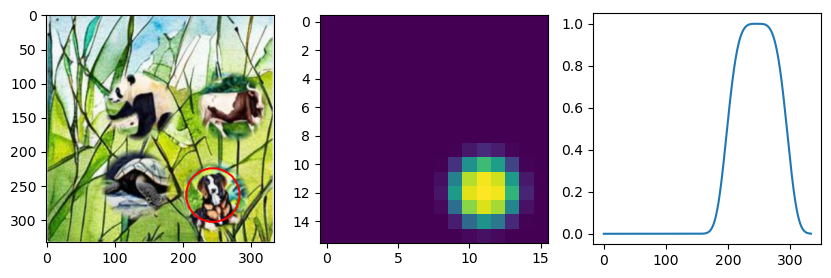

In [18]:
score = lambda x,y, target_x, target_y: np.e**(-(((x-target_x)**2 + (y-target_y)**2) * 40)**2)
target_x, target_y = np.array(positions[0]) / (330,334)
scores = np.array([score(x,y, target_x, target_y) for x,y in zip(coords[:,0], coords[:,1])])
print(scores.max())
scores_img = scores.reshape(grid_size,grid_size)
diag = np.vstack((np.linspace(0,1, num=1000), np.ones(1000)*target_y)).T

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(10,3))
axs[0].imshow(img)
axs[1].imshow(scores_img)
axs[2].plot(np.linspace(0,img.width, 1000), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))])

<BarContainer object of 16 artists>

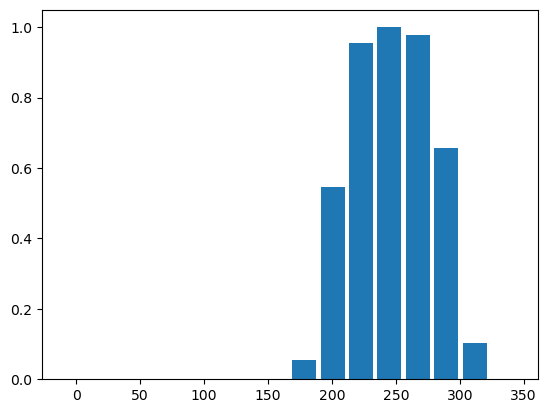

In [19]:
diag = np.vstack((np.linspace(0,1, num=grid_size), np.ones(grid_size)*target_y)).T
plt.bar(np.linspace(0,img.width, grid_size), [score(diag[i][0], diag[i][1], target_x, target_y) for i in range(len(diag))], width=(img.width/grid_size)*0.9)

x shape: (10, 3, 333, 334)
[[[[0.47806945 0.48129156 0.48129156 ... 0.48291144 0.4822925
    0.477594  ]
   [0.48021066 0.48170564 0.48170564 ... 0.48183507 0.48057866
    0.47765192]
   [0.47837904 0.4813767  0.47917685 ... 0.47872224 0.48675326
    0.47689793]
   ...
   [0.46776408 0.47693184 0.47524497 ... 0.4845537  0.47655764
    0.4923603 ]
   [0.46868926 0.4748193  0.47610497 ... 0.48476556 0.4815598
    0.48038313]
   [0.4685835  0.4714995  0.47190395 ... 0.47767672 0.4829989
    0.48412767]]]


 [[[0.47482523 0.47784057 0.47784057 ... 0.47810346 0.47829384
    0.47881603]
   [0.47228047 0.47784057 0.47784057 ... 0.47297847 0.47257778
    0.47703707]
   [0.47060466 0.47022778 0.47231546 ... 0.47297847 0.4711404
    0.47219935]
   ...
   [0.4832957  0.4832957  0.47957462 ... 0.47318423 0.47029892
    0.47108305]
   [0.4832957  0.4832957  0.47957462 ... 0.46872348 0.4696492
    0.4727702 ]
   [0.47096562 0.4781821  0.4781821  ... 0.4690418  0.47041944
    0.4727702 ]]]


 [[[0.47

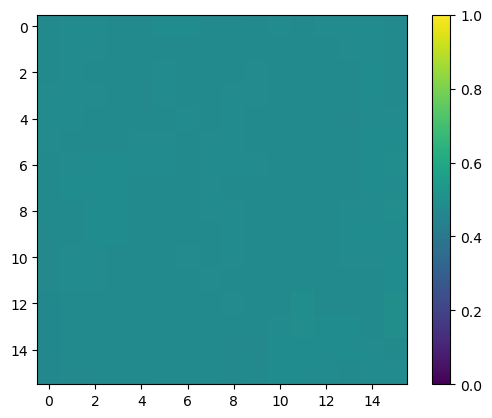

In [23]:
%run v2_training_classes
model = Model_Training(16)
pred = model.predict_pil(images)
plt.imshow(pred[0][0], vmin=0, vmax=1)
plt.colorbar()

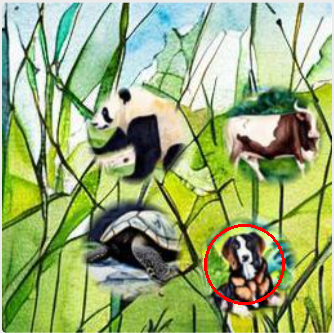

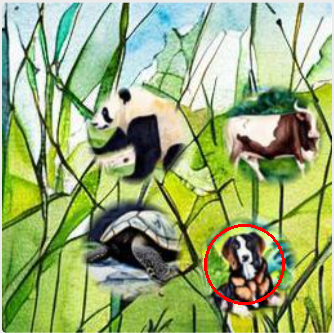

In [21]:
%run v2_handler.py
display_image_with_circle(images[0], positions[0])

image file is truncated
Could not load image: dog/13-13-08-28-988192.png
133
(500, 536)
Found 133 useable images
x shape: (133, 3, 333, 334)
scores shape (133, 16, 16)
Sample 0:
 [[[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.5254902  ... 0.86666667 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.90196078 ... 0.90588235 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]]

 [[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.58039216 ... 0.88235294 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.90196078 ... 0.90980392 0.92156863 0.921

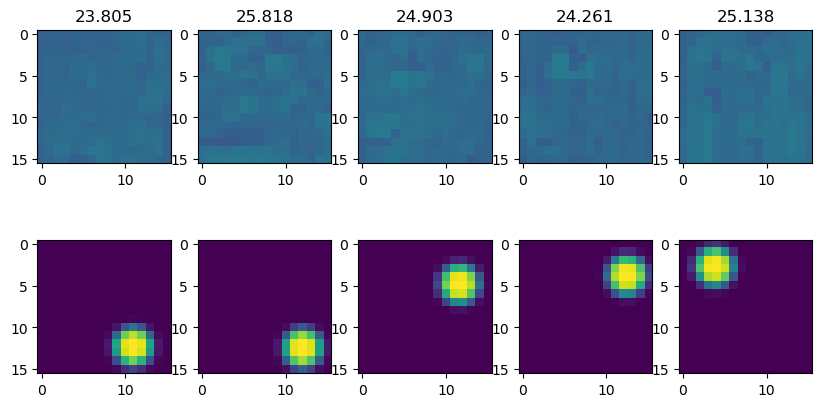

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 2, Train Loss: 0.0248 Test Loss: 0.0245


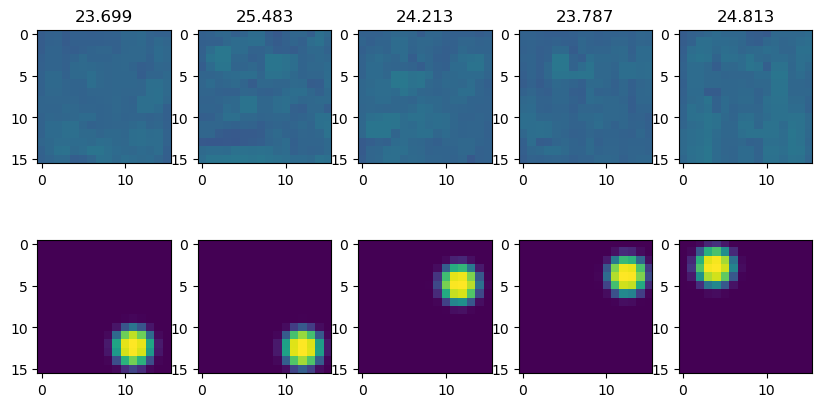

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 3, Train Loss: 0.0239 Test Loss: 0.0231


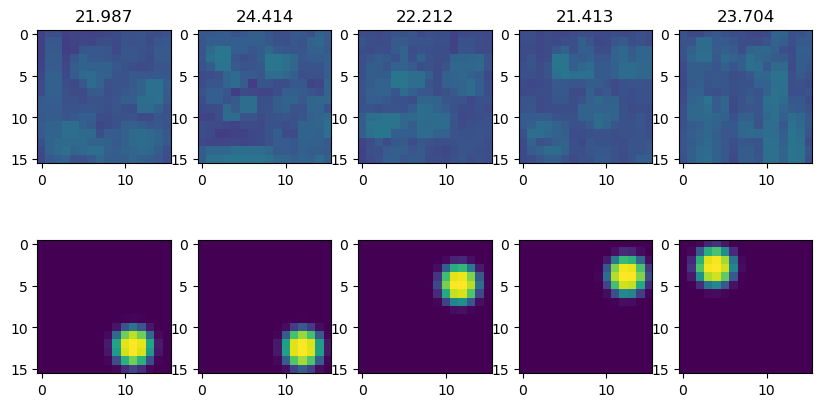

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 4, Train Loss: 0.0221 Test Loss: 0.0202


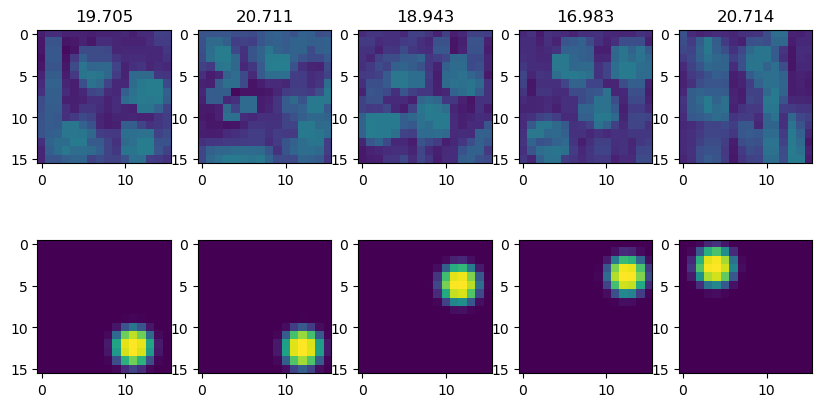

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 5, Train Loss: 0.0209 Test Loss: 0.0205


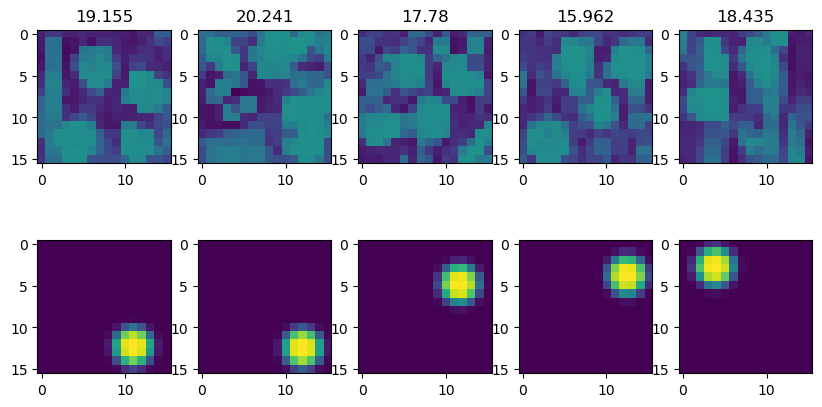

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 6, Train Loss: 0.0202 Test Loss: 0.0212


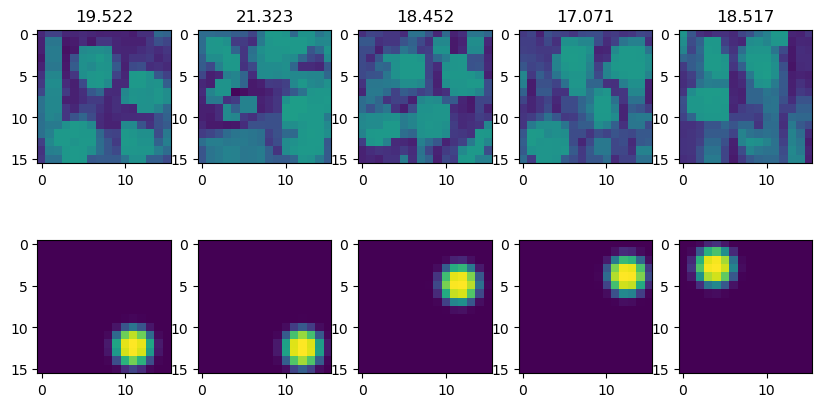

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 7, Train Loss: 0.0199 Test Loss: 0.0194


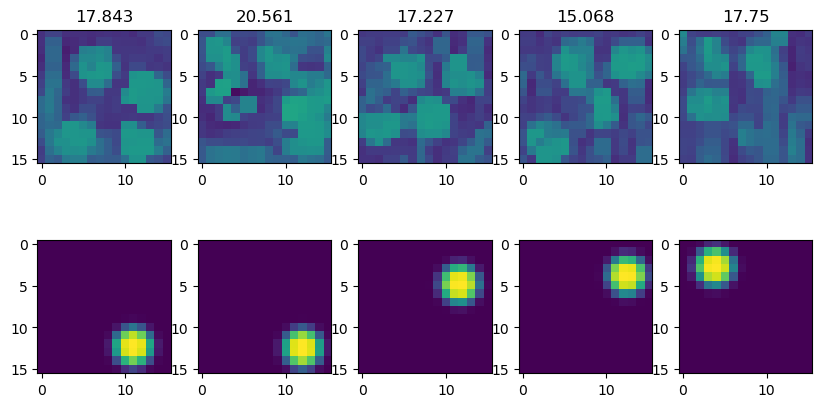

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 8, Train Loss: 0.0186 Test Loss: 0.0175


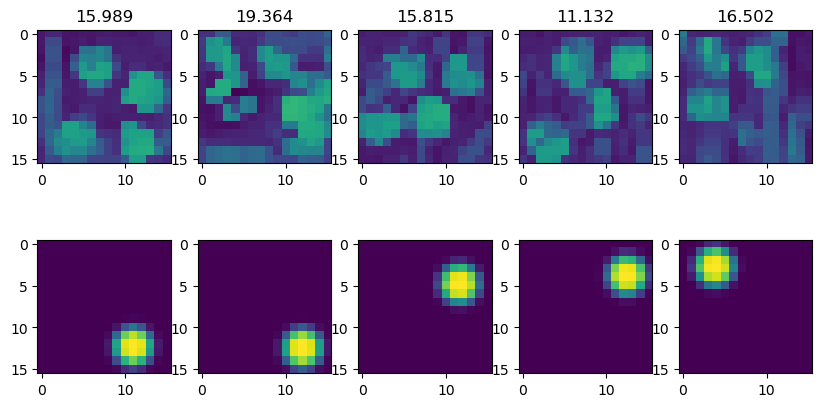

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 9, Train Loss: 0.0178 Test Loss: 0.0180


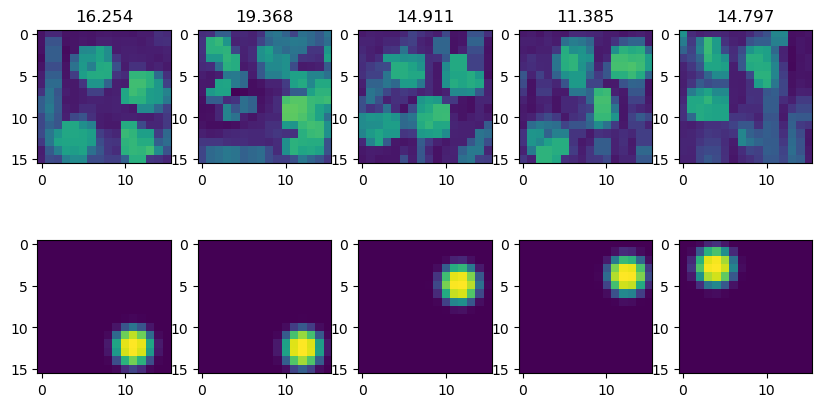

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 10, Train Loss: 0.0179 Test Loss: 0.0188


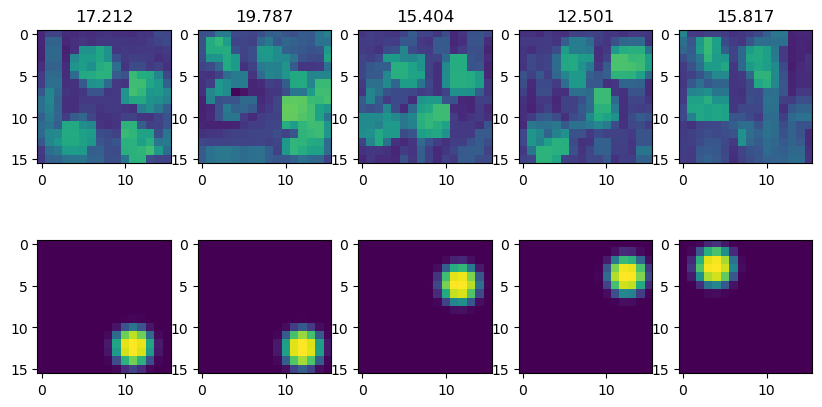

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 11, Train Loss: 0.0176 Test Loss: 0.0170


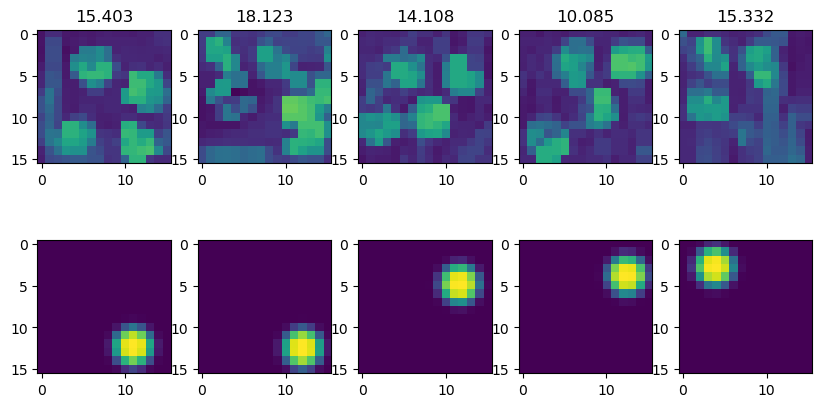

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 12, Train Loss: 0.0175 Test Loss: 0.0176


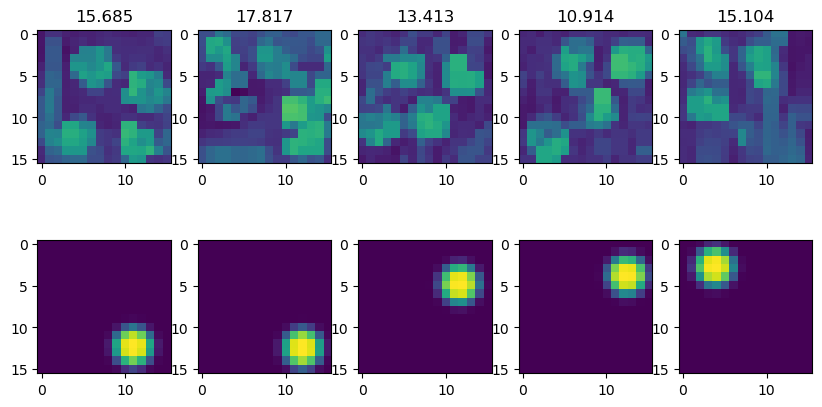

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 13, Train Loss: 0.0170 Test Loss: 0.0174


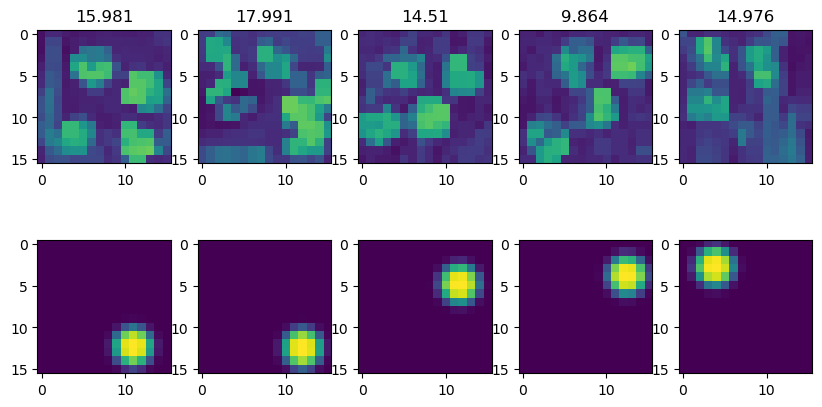

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 14, Train Loss: 0.0171 Test Loss: 0.0165


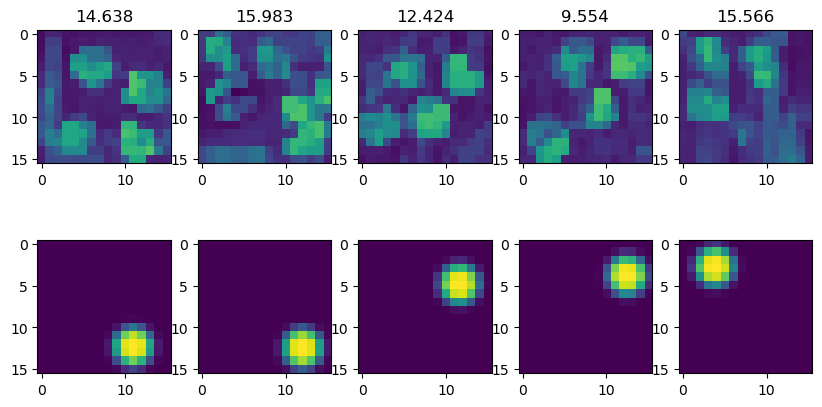

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 15, Train Loss: 0.0171 Test Loss: 0.0163


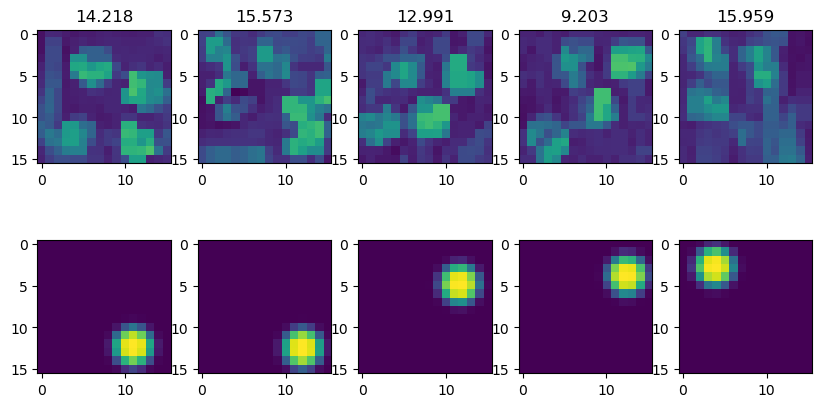

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 16, Train Loss: 0.0160 Test Loss: 0.0165


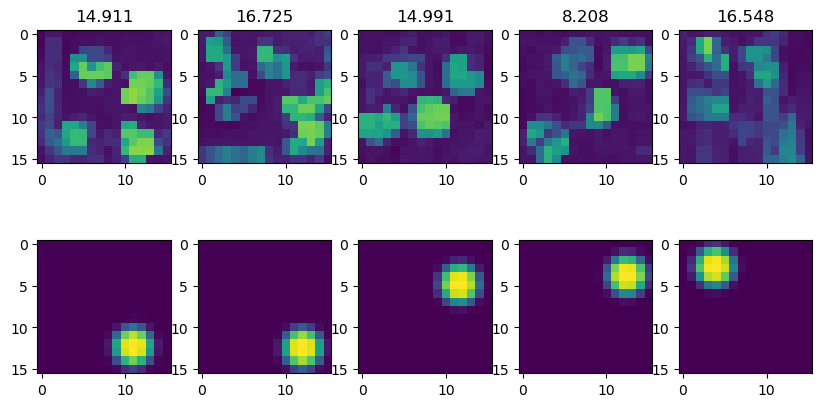

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 17, Train Loss: 0.0158 Test Loss: 0.0158


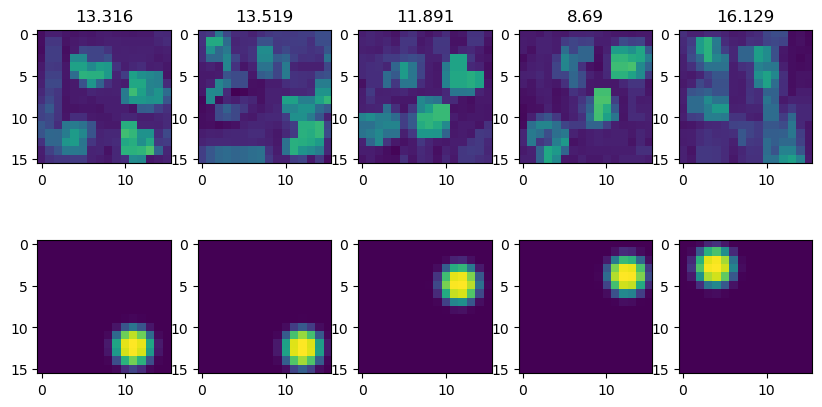

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 18, Train Loss: 0.0153 Test Loss: 0.0163


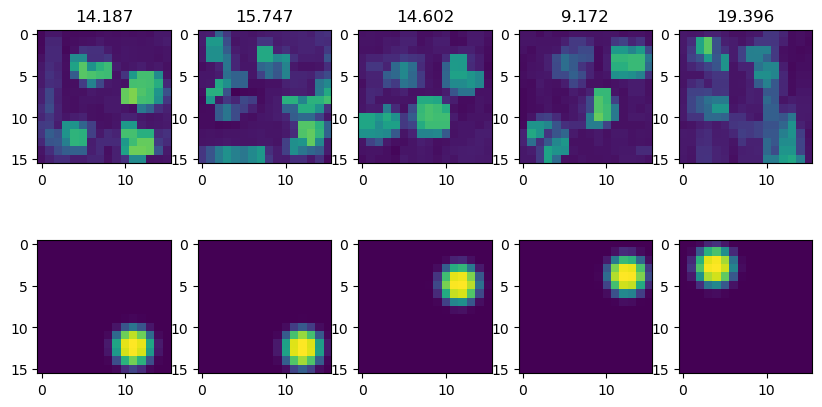

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 19, Train Loss: 0.0157 Test Loss: 0.0164


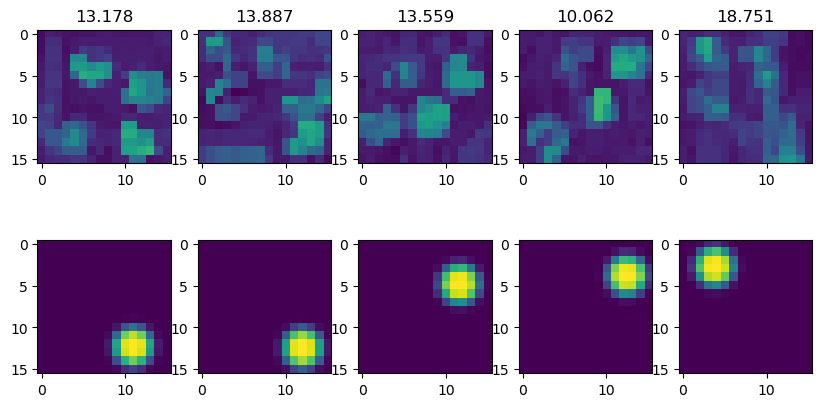

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 20, Train Loss: 0.0155 Test Loss: 0.0158


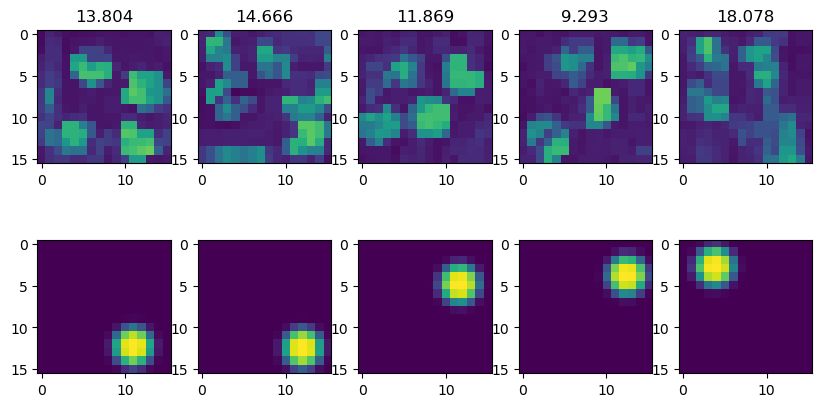

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 21, Train Loss: 0.0155 Test Loss: 0.0161


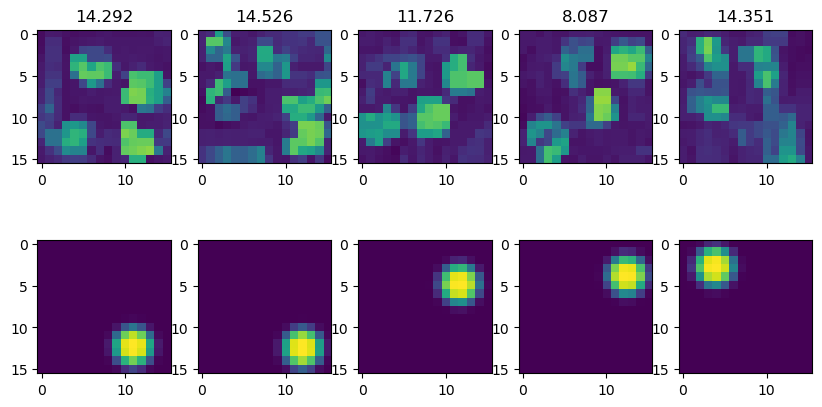

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 22, Train Loss: 0.0164 Test Loss: 0.0174


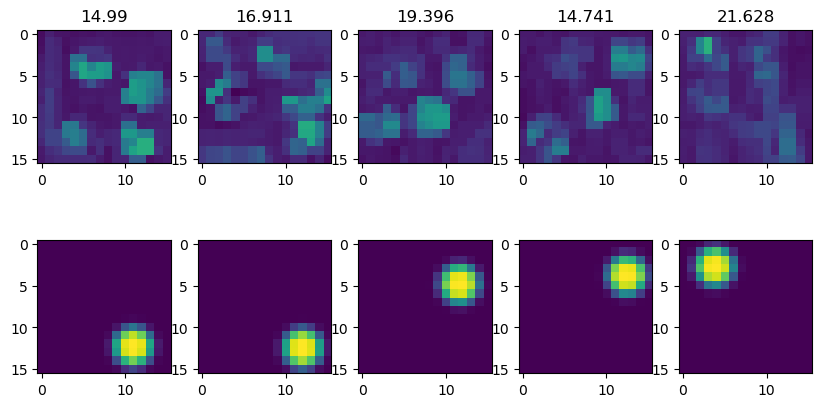

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 23, Train Loss: 0.0157 Test Loss: 0.0161


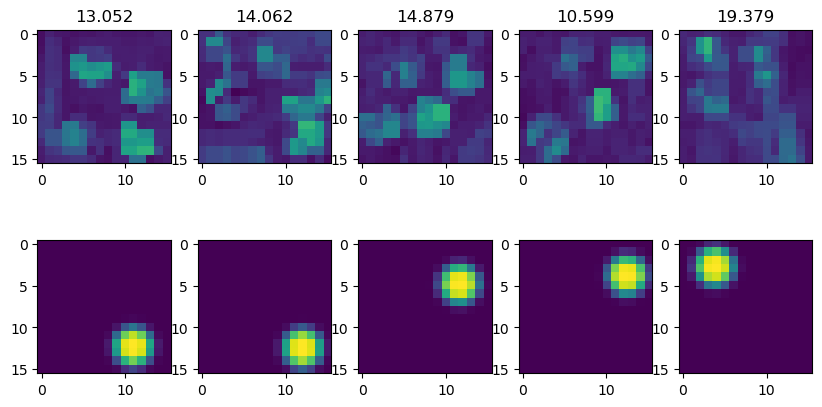

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 24, Train Loss: 0.0151 Test Loss: 0.0157


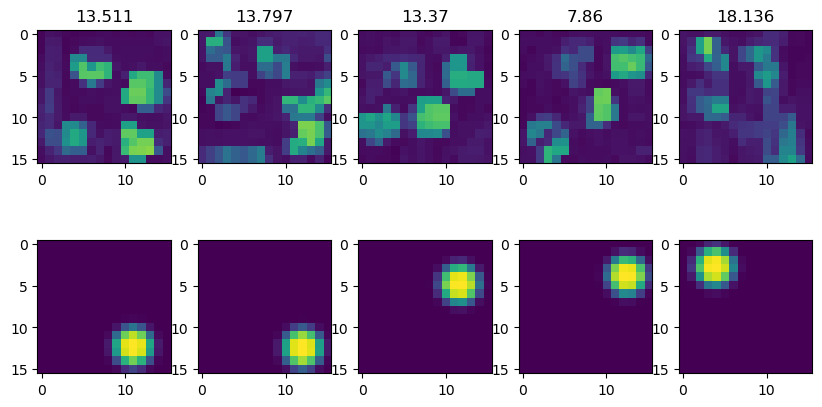

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 25, Train Loss: 0.0151 Test Loss: 0.0154


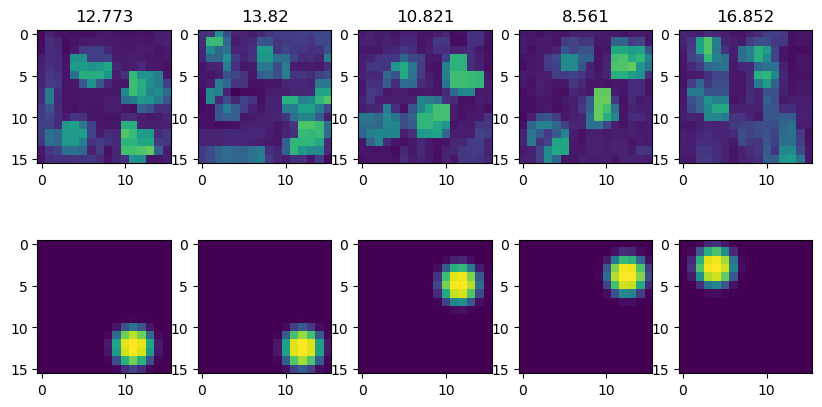

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 26, Train Loss: 0.0152 Test Loss: 0.0157


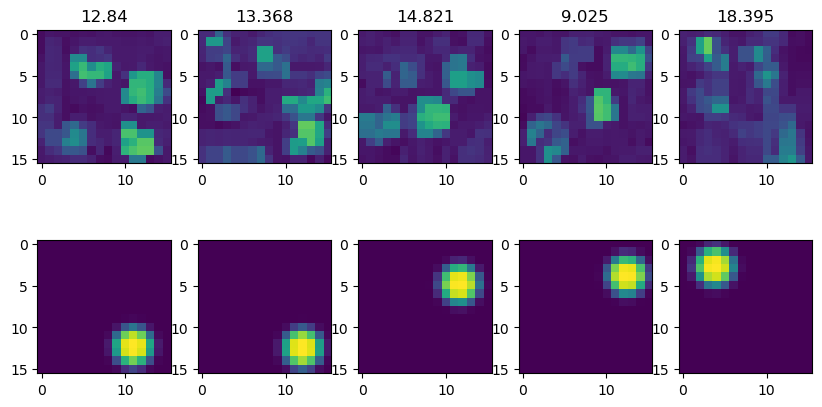

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 27, Train Loss: 0.0150 Test Loss: 0.0165


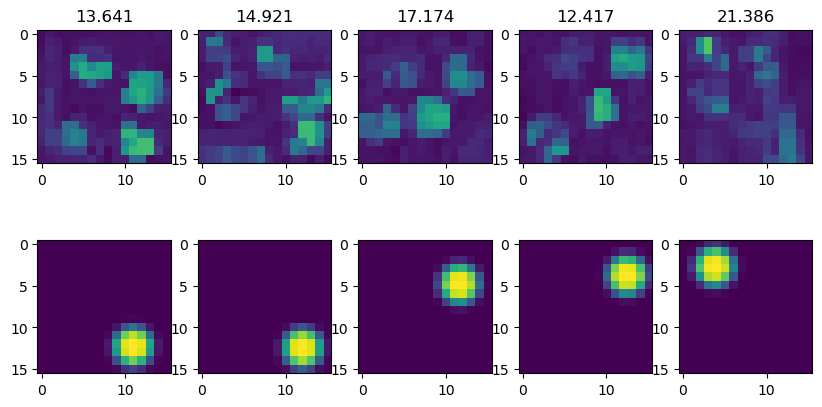

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 28, Train Loss: 0.0152 Test Loss: 0.0163


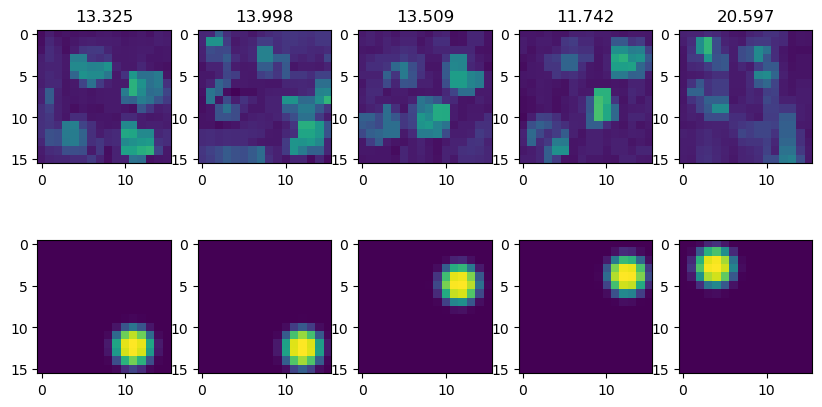

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 29, Train Loss: 0.0149 Test Loss: 0.0151


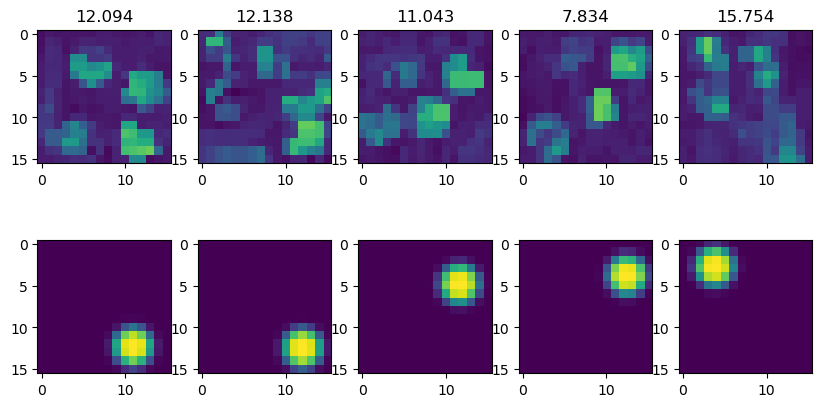

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 30, Train Loss: 0.0152 Test Loss: 0.0164


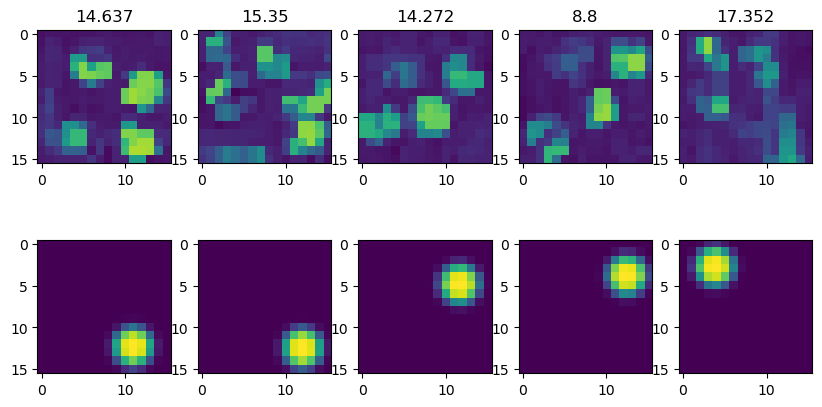

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 31, Train Loss: 0.0147 Test Loss: 0.0168


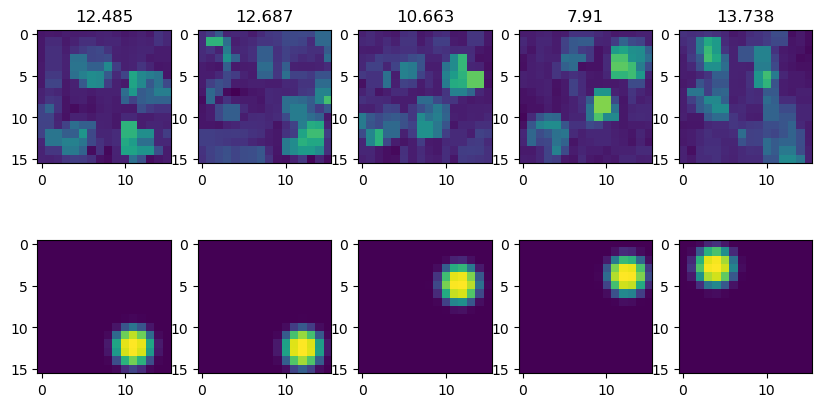

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 32, Train Loss: 0.0150 Test Loss: 0.0162


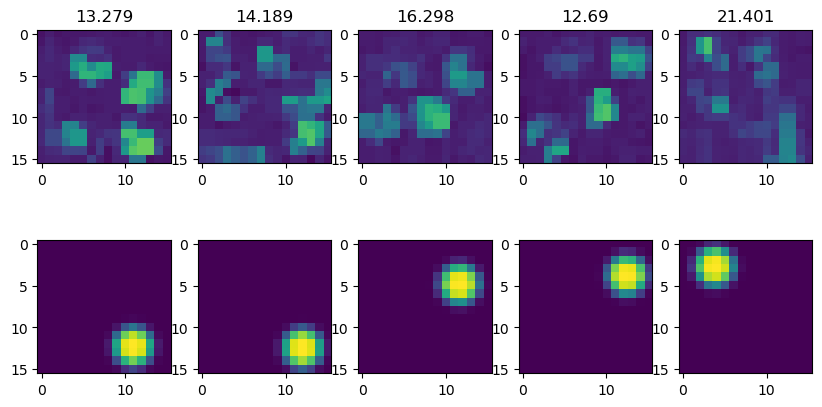

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 33, Train Loss: 0.0147 Test Loss: 0.0151


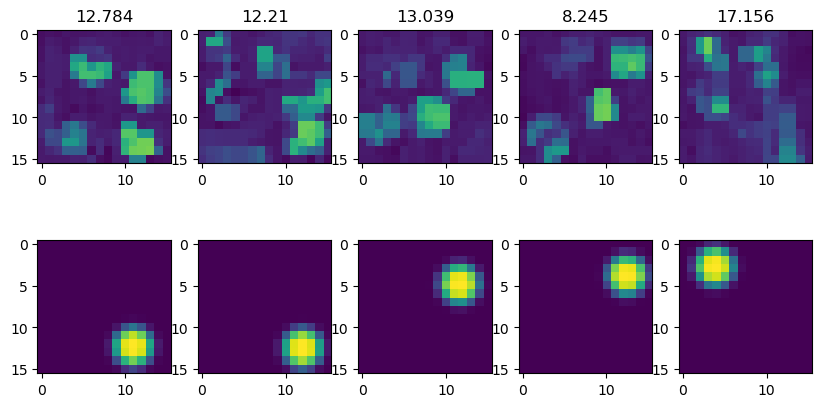

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 34, Train Loss: 0.0145 Test Loss: 0.0152


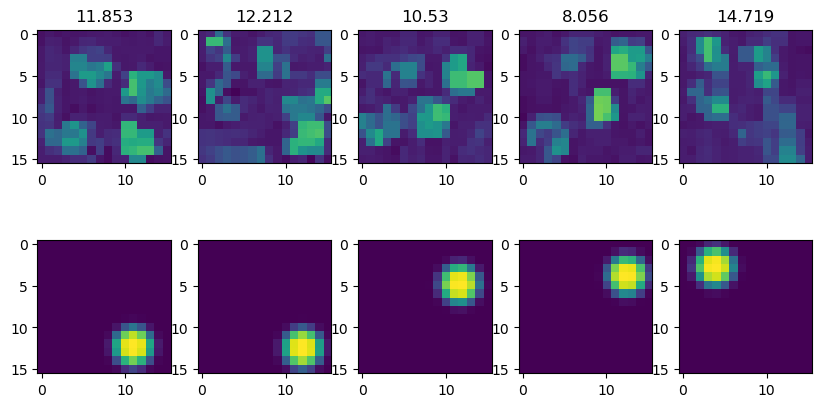

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 35, Train Loss: 0.0144 Test Loss: 0.0156


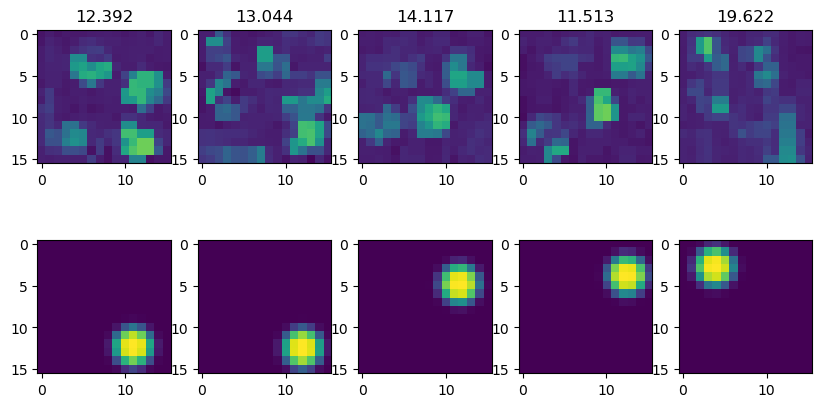

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 36, Train Loss: 0.0141 Test Loss: 0.0152


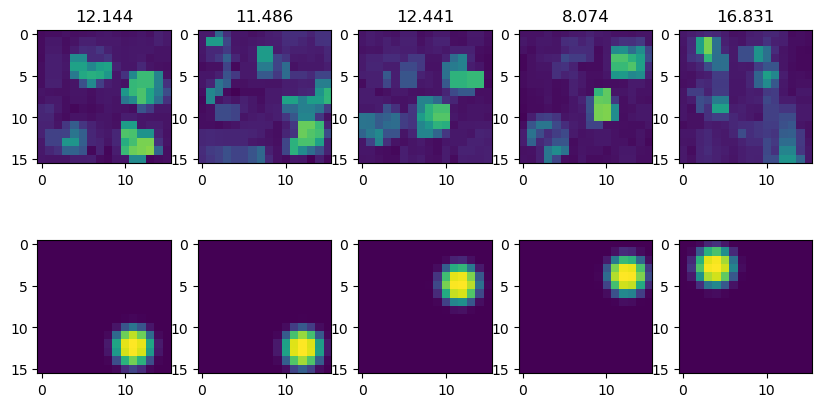

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 37, Train Loss: 0.0142 Test Loss: 0.0163


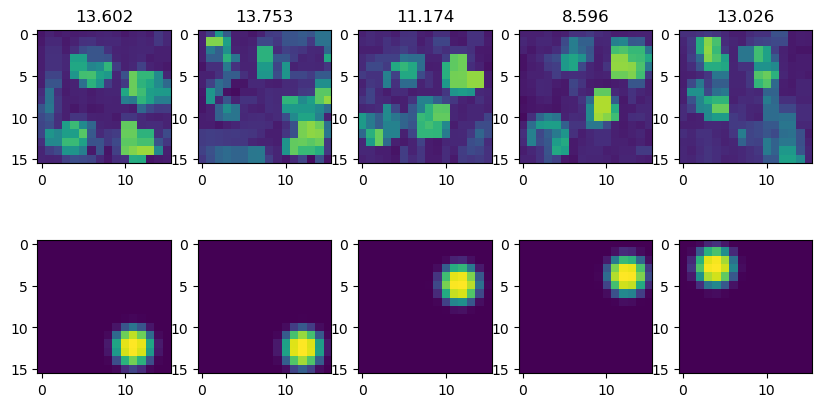

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 38, Train Loss: 0.0152 Test Loss: 0.0165


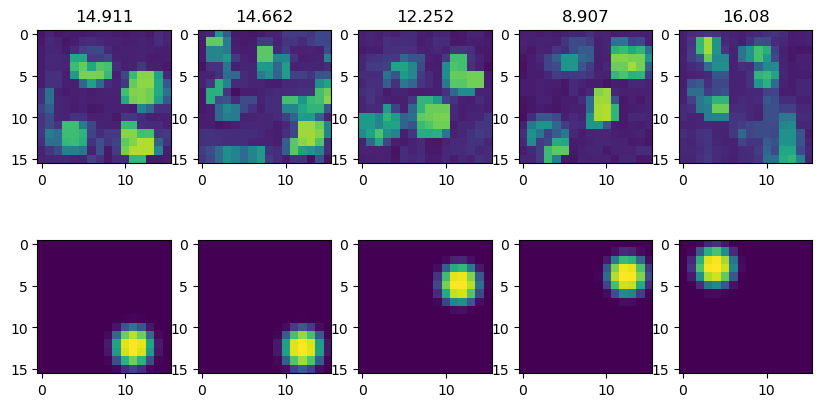

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 39, Train Loss: 0.0152 Test Loss: 0.0150


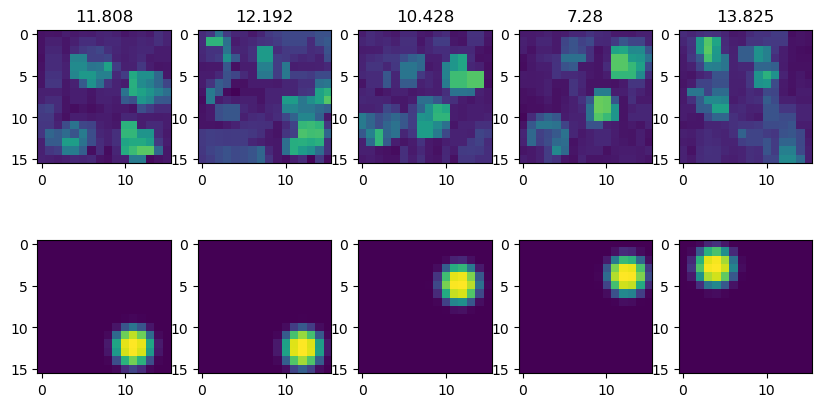

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 40, Train Loss: 0.0143 Test Loss: 0.0152


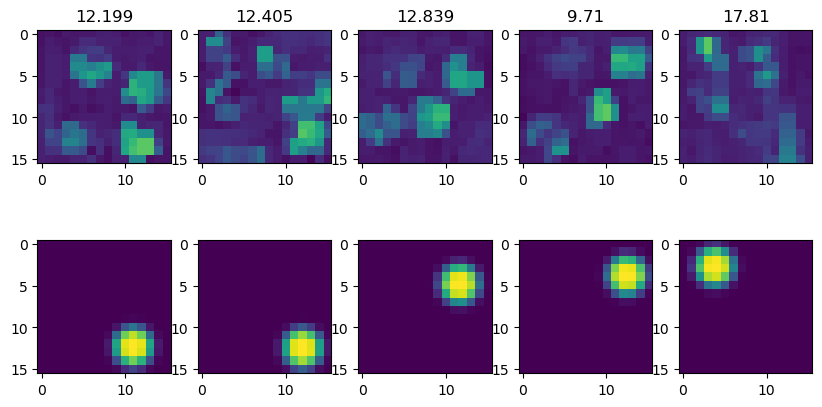

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 41, Train Loss: 0.0142 Test Loss: 0.0154


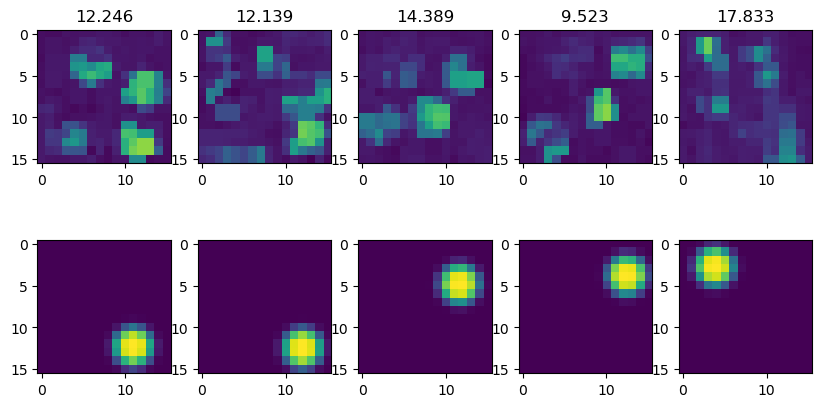

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 42, Train Loss: 0.0142 Test Loss: 0.0153


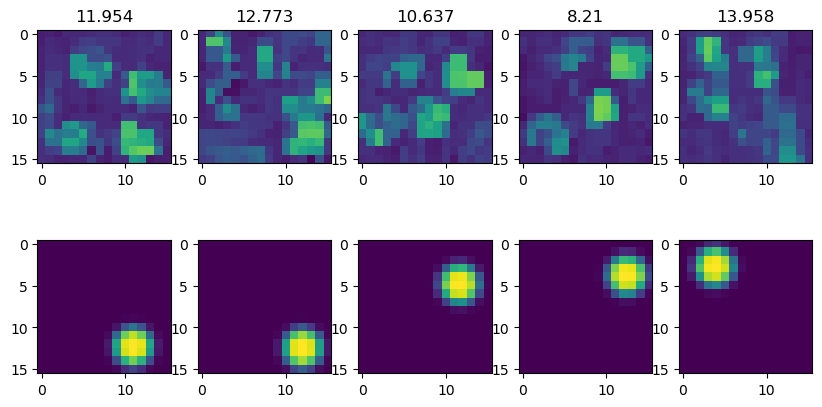

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 43, Train Loss: 0.0141 Test Loss: 0.0151


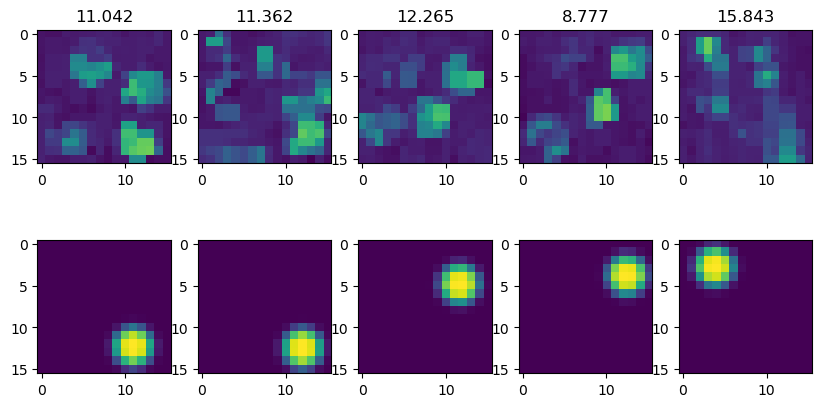

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 44, Train Loss: 0.0137 Test Loss: 0.0157


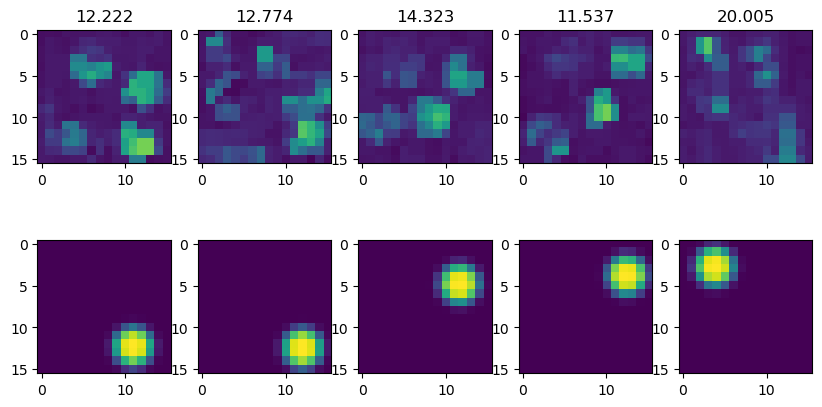

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 45, Train Loss: 0.0141 Test Loss: 0.0150


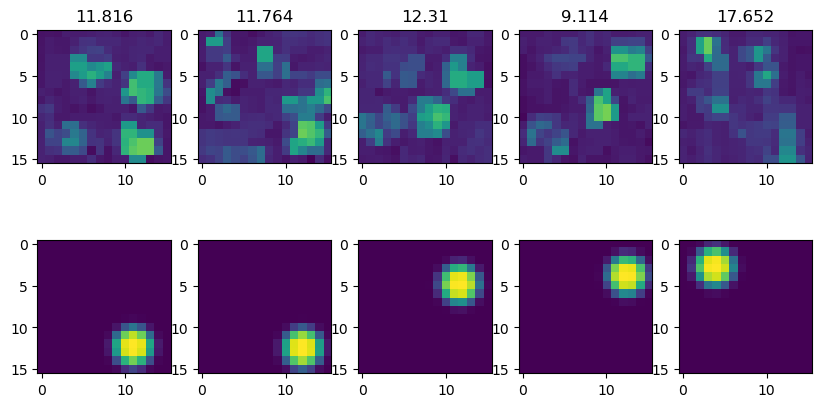

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 46, Train Loss: 0.0142 Test Loss: 0.0152


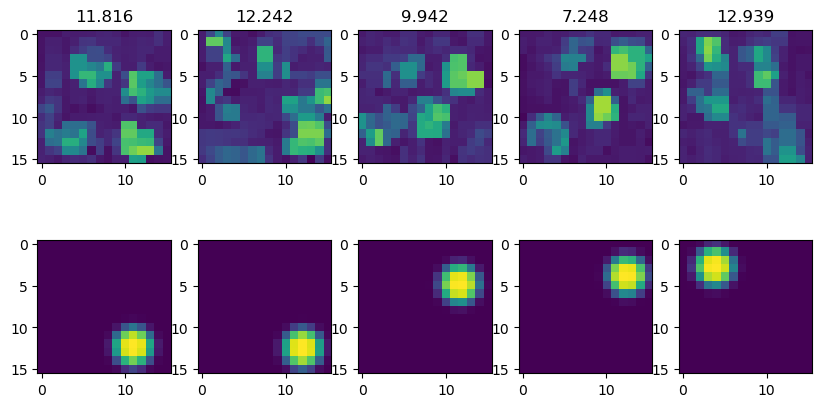

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 47, Train Loss: 0.0137 Test Loss: 0.0152


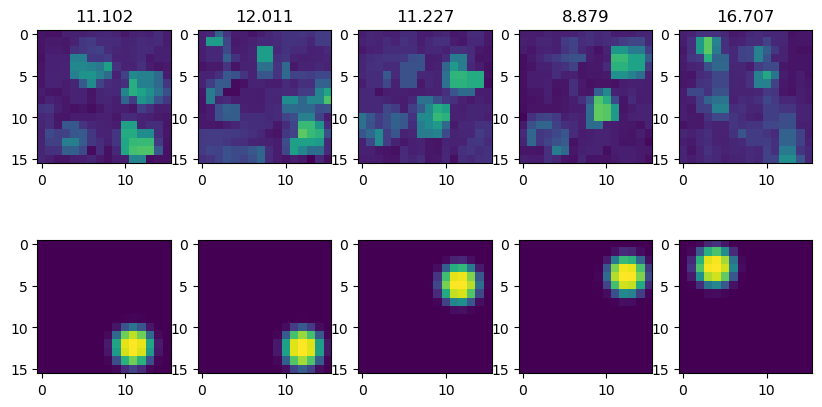

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 48, Train Loss: 0.0135 Test Loss: 0.0147


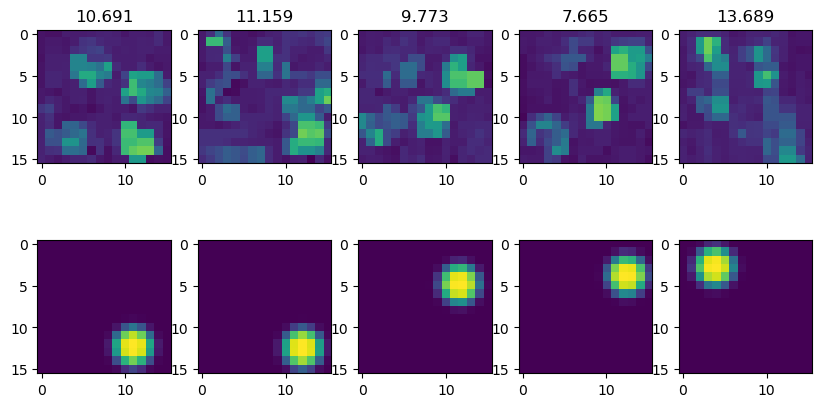

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 49, Train Loss: 0.0133 Test Loss: 0.0148


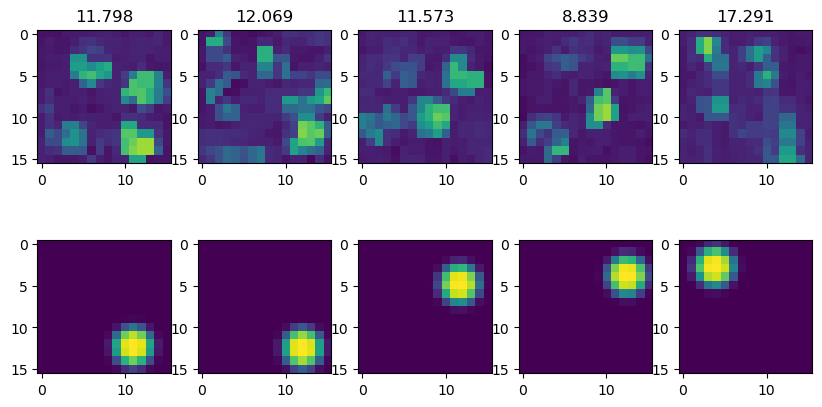

torch.Size([37, 1, 16, 16]) torch.Size([37, 1, 16, 16])
Epoch: 50, Train Loss: 0.0132 Test Loss: 0.0151


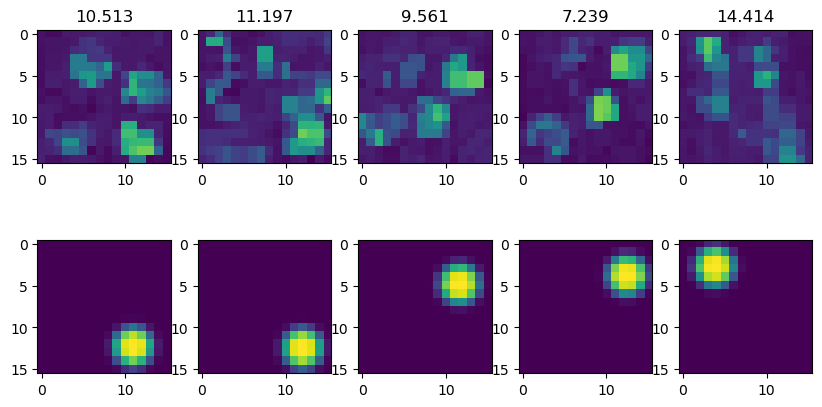

Sequential(
  (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
  (10): AdaptiveMaxPool2d(output_size=(16, 16))
  (11): Sigmoid()
)

In [25]:
%run v2_training_classes
model = Model_Training(16)
model.train(db2, epochs=50)

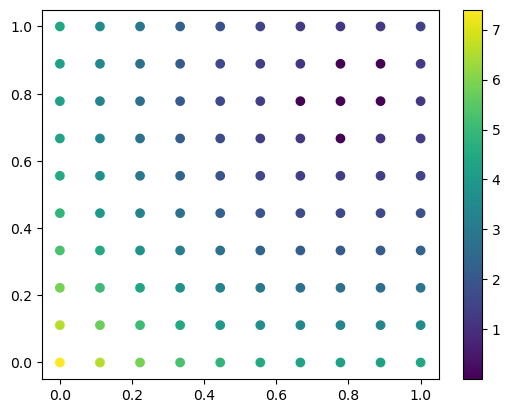

In [ ]:
inputs = np.linspace(0,1,100)
xx, yy = np.meshgrid(inputs, inputs)
coordinates = np.vstack([xx.ravel(), yy.ravel()]).T
coordinates_torch = torch.from_numpy(coordinates).float()
output = np.tile(np.array([0.8,0.8]), (len(coordinates),1))
output_torch = torch.from_numpy(output).float()
# get loss of coordinates by EuclideanDistanceLoss
squared_diff = (output_torch - coordinates_torch) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
from matplotlib import pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:,1], c=loss)
plt.colorbar()

[[0.         0.        ]
 [0.01010101 0.01010101]
 [0.02020202 0.02020202]
 [0.03030303 0.03030303]
 [0.04040404 0.04040404]
 [0.05050505 0.05050505]
 [0.06060606 0.06060606]
 [0.07070707 0.07070707]
 [0.08080808 0.08080808]
 [0.09090909 0.09090909]
 [0.1010101  0.1010101 ]
 [0.11111111 0.11111111]
 [0.12121212 0.12121212]
 [0.13131313 0.13131313]
 [0.14141414 0.14141414]
 [0.15151515 0.15151515]
 [0.16161616 0.16161616]
 [0.17171717 0.17171717]
 [0.18181818 0.18181818]
 [0.19191919 0.19191919]
 [0.2020202  0.2020202 ]
 [0.21212121 0.21212121]
 [0.22222222 0.22222222]
 [0.23232323 0.23232323]
 [0.24242424 0.24242424]
 [0.25252525 0.25252525]
 [0.26262626 0.26262626]
 [0.27272727 0.27272727]
 [0.28282828 0.28282828]
 [0.29292929 0.29292929]
 [0.3030303  0.3030303 ]
 [0.31313131 0.31313131]
 [0.32323232 0.32323232]
 [0.33333333 0.33333333]
 [0.34343434 0.34343434]
 [0.35353535 0.35353535]
 [0.36363636 0.36363636]
 [0.37373737 0.37373737]
 [0.38383838 0.38383838]
 [0.39393939 0.39393939]


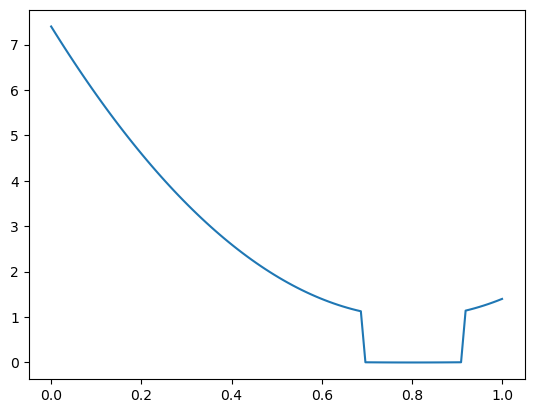

In [ ]:
coords = np.repeat(np.linspace(0,1,100).reshape(-1,1),2, axis=1)
print(coords)
target = np.repeat([[0.8,0.8]], 100, axis=0)
print(target)
squared_diff = (torch.Tensor(target) - torch.tensor(coords)) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
print(loss)
from matplotlib import pyplot as plt
plt.plot(coords[:,0], loss)


In [ ]:
%run v2_training.py
images = [Image.open("../../data/images/v2/"+path) for path in db2.get_solved_captchas(count=10)[0]]
pred = model.predict_pil(images)
pred

In [ ]:
%run v2_handler.py
for i in range(len(images)):
    display_image_with_circle(images[i], pred[i])

In [ ]:
assert 1 == 0

In [ ]:
%run v2_manual_classifier.py
Manual_Classifier(db2)

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

In [ ]:
image_paths = db2.get_unsolved_captchas()
for i in range(len(image_paths)):
    image = Image.open("../"+image_paths[i])
    display(image)

In [ ]:
%run v2_handler.py
v2h = V2_Handler(db2)
v2h.solve_v2(wd)